In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def apply_oil_painting_effect(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)
    # i want to show mmore than one image
    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.title('original image')

    # Check if image is loaded
    if original_image is None:
        print("Can't read the image file.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply gaussian blur to the grayscale image
    blurred_image = cv2.GaussianBlur(gray_image, (21, 21), 0)

    # Detect edges in the image and invert the binary image
    edges = cv2.adaptiveThreshold(blurred_image, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Convert back to color
    colored_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Create the 'oil painting' effect by bitwise_and operation with the inverted edges
    oil_painting_effect = cv2.bitwise_and(original_image, colored_edges)
    plt.subplot(1,2,2)
    plt.imshow(oil_painting_effect)
    plt.title('oil painting effect')
    # Save the final image
    cv2.imwrite(output_image_path, oil_painting_effect)

    print(f"Saved: {output_image_path}")



In [52]:
def apply_oil_painting(image,output_image):
  # Convert the image to grayscale
  image = cv2.imread(image)
  lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

  # Extract the L channel (grayscale information)
  gray = lab[:, :, 0]

  # Apply the Fourier Transform
  f_transform = np.fft.fft2(gray)
  f_shift = np.fft.fftshift(f_transform)

  # Define a circular mask for a low-pass filter
  rows, cols = gray.shape
  crow, ccol = rows // 2, cols // 2
  mask_radius = 50  # Adjust this radius for desired effect
  mask = np.zeros((rows, cols), np.uint8)
  cv2.circle(mask, (ccol, crow), mask_radius, 1, -1)

  # Apply the low-pass filter
  f_shift = f_shift * mask

  # Shift the result back to the original position
  f_ishift = np.fft.ifftshift(f_shift)

  # Apply the inverse Fourier Transform
  filtered_image = np.abs(np.fft.ifft2(f_ishift))

  # Convert to 8-bit for display
  filtered_image = np.uint8(filtered_image)
  filtered_image = cv2.morphologyEx(filtered_image,cv2.MORPH_CLOSE,np.ones((20,20),np.uint8))
  lab[:, :, 0] = filtered_image

  filtered_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

  # Display the original and filtered images using Matplotlib
  plt.figure(figsize=(12, 6))
  plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image'), plt.axis('off')
  plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
  plt.title('Watercolor Effect'), plt.axis('off')
  plt.show()

  cv2.imwrite(output_image, filtered_image)
  print(f"Saved: {output_image}")

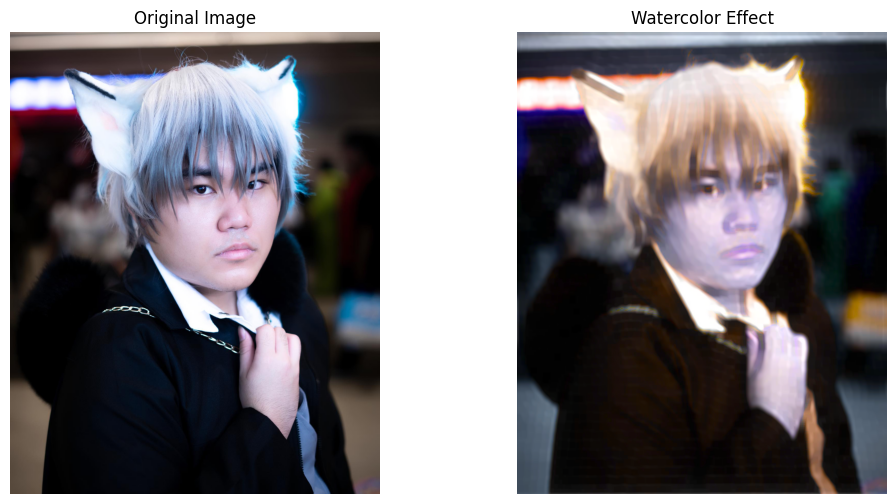

Saved: silverash_oil_painting_effect.jpg


In [53]:
# Using the function
input_file = 'silverash.jpg'  # change to your image file path
output_file = 'silverash_oil_painting_effect.jpg'  # where you want to save the output
apply_oil_painting(input_file, output_file)